# Chest X-ray Project

### Importing needed libraries

In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"  # - only if using AMD card

import keras
import keras.applications as kapp
from keras.applications import *

from keras.preprocessing import image
from keras.models import Model
import numpy as np
import io

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.preprocessing import image
from keras.models import Model


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import time
from sklearn.metrics import accuracy_score
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Images preparation

In [2]:
train_data_dir = r'chest_xray/chest_xray/train'
test_data_dir = r'chest_xray/chest_xray/test'


img_width, img_height = 200, 200
batch_size = 16


nb_train_samples = 10000 # adjustable, possible to increase depending on computing power
nb_validation_samples = 624


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   brightness_range= [0.5,1.5],
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # test images without augmentation, only rescaling

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batch_size, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(img_height, img_width), 
                                                        batch_size=batch_size,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Example of image

1.0


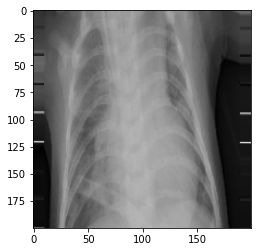

In [3]:
plt.imshow(train_generator[0][0][0])
print(train_generator[0][1][0]) #if 1 then pneumonia

1.0


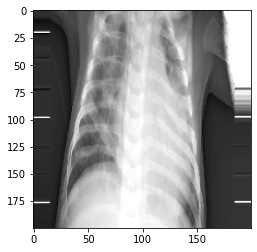

In [4]:
plt.imshow(train_generator[0][0][1])
print(train_generator[0][1][1]) #if 1 then pneumonia

0.0


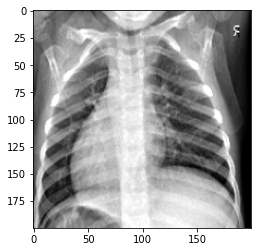

In [5]:
plt.imshow(train_generator[0][0][2])
print(train_generator[0][1][2]) #if 1 then pneumonia

### Model evaluation preparation

In [6]:
def evaluate_model(model, generator):
    score = model.evaluate_generator(generator=generator,              
                                     verbose=0)
    return(score[0], score[1])

In [7]:
# Preparing dashboard
wyniki = pd.DataFrame(columns = ['val_loss','val_acc'])

### Training models

In [8]:
h,w = 200, 200 # hight and width of input data for model

### VGG19

In [9]:
# Model CNN - VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(h,w,3))

# Top layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Combinig base model with additional CNN layers
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Model compilation
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# Callbacks
my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5')
]

# CNN training
new_model.fit_generator(train_generator, steps_per_epoch=nb_train_samples, epochs=80, callbacks=my_callbacks, validation_data=validation_generator, validation_steps=nb_validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80


ValueError: in user code:

    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:543 train_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3349 deserialize
        printable_module_name='metric function')
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:val_loss


In [10]:
# Adding results to dashboard
wyniki.loc['VGG19'] = evaluate_model(new_model, validation_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


ValueError: in user code:

    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:914 test_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3349 deserialize
        printable_module_name='metric function')
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:val_loss


### VGG16

In [ ]:
# Model CNN - VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Top layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Combinig base model with additional CNN layers
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Model compilation
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Callbacks
my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5')
]


# CNN training
new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [11]:
# Adding results to dashboard
wyniki.loc['VGG16'] = evaluate_model(new_model, validation_generator)

ValueError: in user code:

    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:914 test_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3349 deserialize
        printable_module_name='metric function')
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:val_loss


### InceptionV3

In [ ]:
# Model CNN - InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Top layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Combinig base model with additional CNN layers
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Model compilation
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Callbacks
my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5')
]

# CNN training
new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [14]:
# Adding results to dashboard
wyniki.loc['InceptionV3'] = evaluate_model(new_model, validation_generator)

ValueError: in user code:

    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:914 test_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3349 deserialize
        printable_module_name='metric function')
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:val_loss


### Xception

In [ ]:
# Model CNN - Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Top layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Combinig base model with additional CNN layers
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Model compilation
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Callbacks
my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5')
]



# CNN training
new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [16]:
# Adding results to dashboard
wyniki.loc['Xception'] = evaluate_model(new_model, validation_generator)

ValueError: in user code:

    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:914 test_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:322 _build
        self._metrics, y_true, y_pred)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1118 map_structure_up_to
        **kwargs)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1214 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3349 deserialize
        printable_module_name='metric function')
    /home/filippawlak/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:val_loss


### ResNet50

In [ ]:
# Model CNN - ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(h,w,3)) 

# Top layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# Combinig base model with additional CNN layers
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)
new_model.layers[0].trainable = False

# Model compilation
new_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Callbacks
my_callbacks = [
    EarlyStopping(patience=4, monitor='val_loss', min_delta=0.05, restore_best_weights=True),
    ModelCheckpoint(filepath='model1.h5')
]



# CNN training
new_model.fit_generator(train_generator, 
                        steps_per_epoch=nb_train_samples, 
                        epochs=80, 
                        callbacks=my_callbacks, 
                        validation_data=validation_generator, 
                        validation_steps=nb_validation_samples)

In [ ]:
# Adding results to dashboard
wyniki.loc['ResNet50'] = evaluate_model(new_model, validation_generator)

### Comparision between models 

In [17]:
print(wyniki)

Empty DataFrame
Columns: [val_loss, val_acc]
Index: []
